In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
# Loading train and test data

train = pd.read_csv("../Dataset/train_2.csv").drop("Unnamed: 0",1) 
test = pd.read_csv("../Dataset/test_2.csv").drop("Unnamed: 0",1) 

In [3]:
# Splitting data

Y = train["TARGET"]    
X = train.drop("TARGET", 1) 

In [4]:
#Training Model - Logistic Regression - 0.70 Accuracy

model = LogisticRegression(max_iter= 1000)
fit = model.fit(X, Y)

result = pd.DataFrame(fit.predict(test), columns = ["TARGET"])
result.index.name = "ID"
ID = pd.read_csv("../Dataset/test.csv")
result.index = ID["ID"]
result.to_csv("../Dataset/Kaggle.csv")

In [5]:
#Training Model - GBoost - 0.62 Accuracy

model = GradientBoostingClassifier(n_estimators = 1000, max_depth = 2)
fit = model.fit(X, Y)

result = pd.DataFrame(fit.predict(test), columns = ["TARGET"])
result.index.name = "ID"
ID = pd.read_csv("../Dataset/test.csv")
result.index = ID["ID"]
result.to_csv("../Dataset/Kaggle.csv")

Text(0.5, 1.0, 'Feature Importance (MDI)')

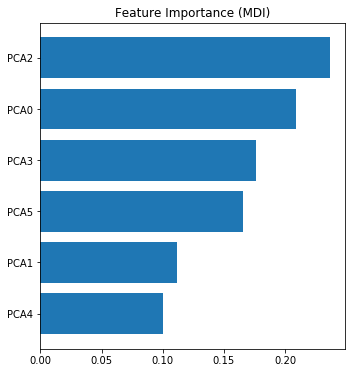

In [6]:
# Feature Selection

feature_importance = fit.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')